In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  
import re
import os

In [58]:
# フォルダのパス
folder_path = "/Users/user/Desktop/Oka/ML-data/24-4-7"

# フォルダ内のファイルのリストを取得
file_list = os.listdir(folder_path)

# ファイルごとに処理を行う
df = pd.DataFrame(columns=['V_cell','P_b','T_cell','stoichi_anode','stoichi_cathode','W_ch','D_ch','i_ave'])
for file_name in file_list:
     # ファイルの絶対パスを作成
    file_path = os.path.join(folder_path, file_name)
    
    # ファイルがディレクトリでない場合に処理を行う
    if not os.path.isdir(file_path):
        # CSVファイルのパス
        with open(file_path, 'r', encoding='cp932', errors='ignore') as file:
            content = file.read()
        # 文字列の置換
        old_string = 'cd.IlMag (A/m^2) '
        new_string = '\n%'
        updated_content = content.replace(old_string, new_string)
        # ファイルを書き込みモードで開いて、更新された内容を書き込む
        with open(file_path, 'w') as file:
            file.write(updated_content)
            
        with open(file_path, 'r') as file:
            lines = file.readlines()
        # データを保持するためのリストを初期化
        data = {
            'V_cell': [],
            'P_b': [],
            'T_cell': [],
            'stoichi_anode': [],
            'stoichi_cathode': []
        }

        # データを抽出してリストに追加
        for line in lines:
            if line.startswith('%@'): #'%@'で始まる行だけTrue、つまり処理が行われる
                parts = line.split(':')
                #index = int(parts[0].split('@')[1].strip())
                #data['Index'].append(index)
                values = parts[1].strip().split(',')
                data['V_cell'].append(float(values[0].split('=')[1].strip().split(' ')[0]))
                data['P_b'].append(float(values[1].split('=')[1].strip().split(' ')[0]))
                data['T_cell'].append(float(values[2].split('=')[1].strip().split(' ')[0]))
                data['stoichi_anode'].append(float(values[3].split('=')[1].strip()))
                data['stoichi_cathode'].append(float(values[4].split('=')[1].strip().split(' ')[0]))

        # データフレームに変換
        df_param = pd.DataFrame(data)

        #W_chとD_chのカラムの追加
        W_ch = re.findall(r'W(\d\.\d+)_',file_path) # ファイル名から数字を抽出
        D_ch = re.findall(r'D(\d\.\d+)_',file_path) # ファイル名から数字を抽出

        # 数字を一列のリストに格納
        data_W = W_ch * 13
        data_D = D_ch * 13

        # 13行のデータフレームを作成
        df_param2 = pd.DataFrame({'W_ch':data_W,'D_ch':data_D})

        #電流密度のデータフレームを作製
        current_row = 1
        split_pattern = re.compile(r'\s+')  # 空白文字に基づいて行を分割する正規表現パターン
        for line in lines:
            if current_row == 22:
                i_data = split_pattern.split(line.strip())
                df_i = pd.DataFrame({'i_ave':i_data})
                break #ループを抜ける
            current_row += 1

        #データフレームの結合
        df_k = pd.concat([df_param,df_param2], axis=1)
        df_k = pd.concat([df_k,df_i], axis=1)
        df = pd.concat([df,df_k], axis=0)    
# データフレームを表示
df


C:\Users\user\AppData\Local\Temp\ipykernel_22764\419589224.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_k], axis=0)


,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave
0,1.00,0.0,373.15,1.5,2.0,0.4,0.4,5.038917457576446
1,0.95,0.0,373.15,1.5,2.0,0.4,0.4,22.774962529764043
2,0.90,0.0,373.15,1.5,2.0,0.4,0.4,90.51477290072863
3,0.85,0.0,373.15,1.5,2.0,0.4,0.4,273.0582413446479
4,0.80,0.0,373.15,1.5,2.0,0.4,0.4,606.0208737438263
...,...,...,...,...,...,...,...,...
8,0.60,0.0,393.15,5.5,6.0,1.6,1.6,4478.7704971804405
9,0.55,0.0,393.15,5.5,6.0,1.6,1.6,5426.748374479319
10,0.50,0.0,393.15,5.5,6.0,1.6,1.6,6384.839711568359
11,0.45,0.0,393.15,5.5,6.0,1.6,1.6,7311.85251006711


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 12
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   V_cell           351 non-null    float64
 1   P_b              351 non-null    float64
 2   T_cell           351 non-null    float64
 3   stoichi_anode    351 non-null    float64
 4   stoichi_cathode  351 non-null    float64
 5   W_ch             351 non-null    object 
 6   D_ch             351 non-null    object 
 7   i_ave            351 non-null    object 
dtypes: float64(5), object(3)
memory usage: 24.7+ KB


In [60]:
df= df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 12
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   V_cell           351 non-null    float64
 1   P_b              351 non-null    float64
 2   T_cell           351 non-null    float64
 3   stoichi_anode    351 non-null    float64
 4   stoichi_cathode  351 non-null    float64
 5   W_ch             351 non-null    float64
 6   D_ch             351 non-null    float64
 7   i_ave            351 non-null    float64
dtypes: float64(8)
memory usage: 24.7 KB


In [39]:
df['W']=df['V_cell']*df['i_ave']
df

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave,W
0,1.00,0.0,373.15,1.5,2.0,0.4,0.4,5.038917,5.038917
1,0.95,0.0,373.15,1.5,2.0,0.4,0.4,22.774963,21.636214
2,0.90,0.0,373.15,1.5,2.0,0.4,0.4,90.514773,81.463296
3,0.85,0.0,373.15,1.5,2.0,0.4,0.4,273.058241,232.099505
4,0.80,0.0,373.15,1.5,2.0,0.4,0.4,606.020874,484.816699
...,...,...,...,...,...,...,...,...,...
8,0.60,0.0,393.15,5.5,6.0,1.6,1.6,4478.770497,2687.262298
9,0.55,0.0,393.15,5.5,6.0,1.6,1.6,5426.748374,2984.711606
10,0.50,0.0,393.15,5.5,6.0,1.6,1.6,6384.839712,3192.419856
11,0.45,0.0,393.15,5.5,6.0,1.6,1.6,7311.852510,3290.333630


In [40]:
df['W']=df['W']*0.01
df

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave,W
0,1.00,0.0,373.15,1.5,2.0,0.4,0.4,5.038917,0.050389
1,0.95,0.0,373.15,1.5,2.0,0.4,0.4,22.774963,0.216362
2,0.90,0.0,373.15,1.5,2.0,0.4,0.4,90.514773,0.814633
3,0.85,0.0,373.15,1.5,2.0,0.4,0.4,273.058241,2.320995
4,0.80,0.0,373.15,1.5,2.0,0.4,0.4,606.020874,4.848167
...,...,...,...,...,...,...,...,...,...
8,0.60,0.0,393.15,5.5,6.0,1.6,1.6,4478.770497,26.872623
9,0.55,0.0,393.15,5.5,6.0,1.6,1.6,5426.748374,29.847116
10,0.50,0.0,393.15,5.5,6.0,1.6,1.6,6384.839712,31.924199
11,0.45,0.0,393.15,5.5,6.0,1.6,1.6,7311.852510,32.903336


In [41]:
df['i_ave']=df['i_ave']*0.0001  #[A/m2]から[A/cm2]へ
df

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave,W
0,1.00,0.0,373.15,1.5,2.0,0.4,0.4,0.000504,0.050389
1,0.95,0.0,373.15,1.5,2.0,0.4,0.4,0.002277,0.216362
2,0.90,0.0,373.15,1.5,2.0,0.4,0.4,0.009051,0.814633
3,0.85,0.0,373.15,1.5,2.0,0.4,0.4,0.027306,2.320995
4,0.80,0.0,373.15,1.5,2.0,0.4,0.4,0.060602,4.848167
...,...,...,...,...,...,...,...,...,...
8,0.60,0.0,393.15,5.5,6.0,1.6,1.6,0.447877,26.872623
9,0.55,0.0,393.15,5.5,6.0,1.6,1.6,0.542675,29.847116
10,0.50,0.0,393.15,5.5,6.0,1.6,1.6,0.638484,31.924199
11,0.45,0.0,393.15,5.5,6.0,1.6,1.6,0.731185,32.903336


In [42]:
df2 = df[(df['V_cell']==0.60)]
df2

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave,W
8,0.6,0.0,373.15,1.5,2.0,0.4,0.4,0.314297,18.857806
8,0.6,0.0,383.15,3.5,4.0,0.4,0.4,0.387781,23.266873
8,0.6,0.0,393.15,5.5,6.0,0.4,0.4,0.470880,28.252774
8,0.6,101330.0,383.15,5.5,2.0,0.4,0.8,0.433485,26.009080
8,0.6,101330.0,393.15,1.5,4.0,0.4,0.8,0.522295,31.337685
8,0.6,101330.0,373.15,3.5,6.0,0.4,0.8,0.358502,21.510128
8,0.6,202650.0,393.15,3.5,2.0,0.4,1.6,0.552043,33.122605
8,0.6,202650.0,373.15,5.5,4.0,0.4,1.6,0.381963,22.917795
8,0.6,202650.0,383.15,1.5,6.0,0.4,1.6,0.463807,27.828415
8,0.6,202650.0,393.15,3.5,2.0,0.8,0.4,0.551192,33.071513


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# 分散分析モデルの定義
model = ols('W ~ C(P_b) + C(T_cell) + C(stoichi_anode) + C(stoichi_cathode) + C(W_ch) + C(D_ch)', data=df2).fit()

# 分散分析表の表示
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(P_b),201.316130,2.0,11.441744,0.001135
C(T_cell),283.229865,2.0,16.097287,0.000235
C(stoichi_anode),24.357803,2.0,1.384369,0.282744
C(stoichi_cathode),20.989878,2.0,1.192954,0.332355
C(W_ch),16.248534,2.0,0.923481,0.420024
C(D_ch),17.702291,2.0,1.006105,0.390605
Residual,123.164173,14.0,NaN,NaN


In [30]:
# 各要素の変動を取得
total_variance = anova_table['sum_sq']['Residual']  + anova_table['sum_sq']['C(P_b)'] + \
                anova_table['sum_sq']['C(T_cell)'] + anova_table['sum_sq']['C(stoichi_anode)'] + anova_table['sum_sq']['C(stoichi_cathode)'] + \
                anova_table['sum_sq']['C(W_ch)'] + anova_table['sum_sq']['C(D_ch)']

treatment_variance = anova_table['sum_sq']['C(P_b)'] + \
                    anova_table['sum_sq']['C(T_cell)'] + anova_table['sum_sq']['C(stoichi_anode)'] + \
                    anova_table['sum_sq']['C(stoichi_cathode)'] + anova_table['sum_sq']['C(W_ch)'] + \
                    anova_table['sum_sq']['C(D_ch)']

# 各因子の寄与率を計算してデータフレームに追加
anova_table['Contribution'] = (anova_table['sum_sq']-anova_table['df']*anova_table['sum_sq']['Residual']/anova_table['df']['Residual'])/ anova_table['sum_sq'].sum()

anova_table

,sum_sq,df,F,PR(>F),Contribution
C(P_b),201.316130,2.0,11.441744,0.001135,0.267422
C(T_cell),283.229865,2.0,16.097287,0.000235,0.386654
C(stoichi_anode),24.357803,2.0,1.384369,0.282744,0.009844
C(stoichi_cathode),20.989878,2.0,1.192954,0.332355,0.004942
C(W_ch),16.248534,2.0,0.923481,0.420024,-0.001960
C(D_ch),17.702291,2.0,1.006105,0.390605,0.000156
Residual,123.164173,14.0,NaN,NaN,0.000000


In [15]:
anova_table['sum_sq']['Residual']

1231641.7278647015

In [19]:
(anova_table['sum_sq']['C(T_cell)']-(2*anova_table['sum_sq']['Residual']/14))/total_variance

0.38665448207888

In [20]:
(anova_table['sum_sq']['C(P_b)']-(2*anova_table['sum_sq']['Residual']/14))/total_variance

0.2674220208993149

In [21]:
anova_table['sum_sq']['C(P_b)']/total_variance

0.29303287923930055

In [43]:
# 分散分析モデルの定義
model2 = ols('i_ave ~ C(V_cell) + C(P_b) + C(T_cell) + C(stoichi_anode) + C(stoichi_cathode) + C(W_ch) + C(D_ch)', data=df).fit()

# 分散分析表の表示
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(V_cell),25.192650,12.0,782.983479,3.975779e-232
C(P_b),0.409903,2.0,76.438268,5.998309e-28
C(T_cell),0.560399,2.0,104.502611,8.552858e-36
C(stoichi_anode),0.051453,2.0,9.594824,8.934154e-05
C(stoichi_cathode),0.043622,2.0,8.134634,3.568619e-04
C(W_ch),0.031646,2.0,5.901325,3.036627e-03
C(D_ch),0.033023,2.0,6.158141,2.370479e-03
Residual,0.874093,326.0,NaN,NaN


In [44]:
# 各要素の変動を取得
total_variance2 = anova_table2['sum_sq']['Residual']  + anova_table2['sum_sq']['C(P_b)'] + \
                anova_table2['sum_sq']['C(T_cell)'] + anova_table2['sum_sq']['C(stoichi_anode)'] + anova_table2['sum_sq']['C(stoichi_cathode)'] + \
                anova_table2['sum_sq']['C(W_ch)'] + anova_table2['sum_sq']['C(D_ch)']

treatment_variance2 = anova_table2['sum_sq']['C(P_b)'] + \
                    anova_table2['sum_sq']['C(T_cell)'] + anova_table2['sum_sq']['C(stoichi_anode)'] + \
                    anova_table2['sum_sq']['C(stoichi_cathode)'] + anova_table2['sum_sq']['C(W_ch)'] + \
                    anova_table2['sum_sq']['C(D_ch)']

# 各因子の寄与率を計算してデータフレームに追加
anova_table2['Contribution'] = (anova_table2['sum_sq']-anova_table2['df']*anova_table2['sum_sq']['Residual']/anova_table2['df']['Residual'])/ anova_table2['sum_sq'].sum()

anova_table2

,sum_sq,df,F,PR(>F),Contribution
C(V_cell),25.192650,12.0,782.983479,3.975779e-232,9.251267e-01
C(P_b),0.409903,2.0,76.438268,5.998309e-28,1.487456e-02
C(T_cell),0.560399,2.0,104.502611,8.552858e-36,2.040815e-02
C(stoichi_anode),0.051453,2.0,9.594824,8.934154e-05,1.694687e-03
C(stoichi_cathode),0.043622,2.0,8.134634,3.568619e-04,1.406773e-03
C(W_ch),0.031646,2.0,5.901325,3.036627e-03,9.664199e-04
C(D_ch),0.033023,2.0,6.158141,2.370479e-03,1.017058e-03
Residual,0.874093,326.0,NaN,NaN,4.082184e-18


In [72]:
# 分散分析モデルの定義
model3 = ols('i_ave ~C(P_b) + C(T_cell) + C(stoichi_anode) + C(stoichi_cathode) + C(W_ch) + C(D_ch)', data=df2).fit()

# 分散分析表の表示
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table3

,sum_sq,df,F,PR(>F)
C(P_b),0.055921,2.0,11.441744,0.001135
C(T_cell),0.078675,2.0,16.097287,0.000235
C(stoichi_anode),0.006766,2.0,1.384369,0.282744
C(stoichi_cathode),0.005831,2.0,1.192954,0.332355
C(W_ch),0.004513,2.0,0.923481,0.420024
C(D_ch),0.004917,2.0,1.006105,0.390605
Residual,0.034212,14.0,NaN,NaN


In [73]:
# 各因子の寄与率を計算してデータフレームに追加
anova_table3['Contribution'] = (anova_table3['sum_sq']-anova_table3['df']*anova_table3['sum_sq']['Residual']/anova_table3['df']['Residual'])/ anova_table3['sum_sq'].sum()

anova_table3

,sum_sq,df,F,PR(>F),Contribution
C(P_b),0.055921,2.0,11.441744,0.001135,0.267422
C(T_cell),0.078675,2.0,16.097287,0.000235,0.386654
C(stoichi_anode),0.006766,2.0,1.384369,0.282744,0.009844
C(stoichi_cathode),0.005831,2.0,1.192954,0.332355,0.004942
C(W_ch),0.004513,2.0,0.923481,0.420024,-0.001960
C(D_ch),0.004917,2.0,1.006105,0.390605,0.000156
Residual,0.034212,14.0,NaN,NaN,0.000000


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
df.to_csv("CD_OA")

In [24]:
for col in df.columns:
    scaler =  StandardScaler()
    df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1, 1))
    
df.head()

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave,W
0,1.603567,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045,-1.112521,-1.350405
1,1.336306,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045,-1.106150,-1.337033
2,1.069045,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045,-1.081814,-1.288833
3,0.801784,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045,-1.016236,-1.167473
4,0.534522,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045,-0.896620,-0.963870


In [25]:
df.to_csv("CD_OA_std")

In [26]:
for col in df.columns:
    scaler =  MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])
    
df.head()

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave,W
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.001754,0.004106
2,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.008453,0.018908
3,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.026505,0.056178
4,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.059432,0.118703


Text(0, 0.5, 'i_ave[A/cm2]')

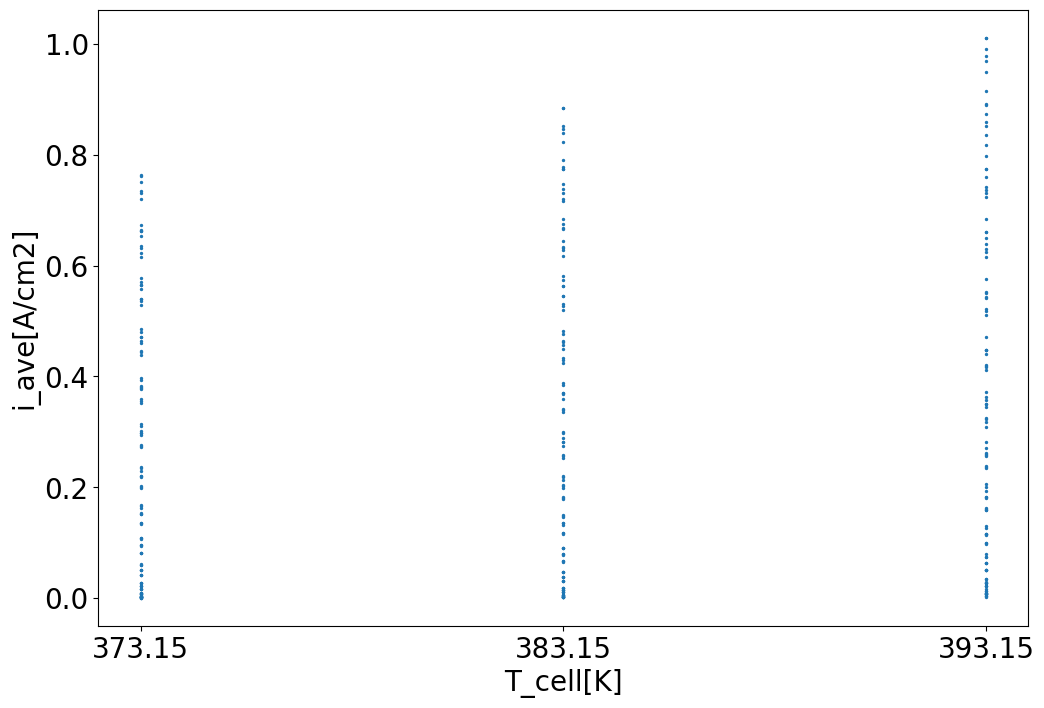

In [66]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sc = ax.scatter(df['T_cell'],df['i_ave']*0.0001,s=2,zorder=0)

# 目盛りのサイズを大きくする
ax.tick_params(axis='both', which='major', labelsize=20)

# x軸の値を指定
plt.xticks([373.15,383.15,393.15])

# 軸ラベルを追加
ax.set_xlabel('T_cell[K]', fontsize=20)
ax.set_ylabel('i_ave[A/cm2]', fontsize=20)

Text(0, 0.5, 'i_ave[A/cm2]')

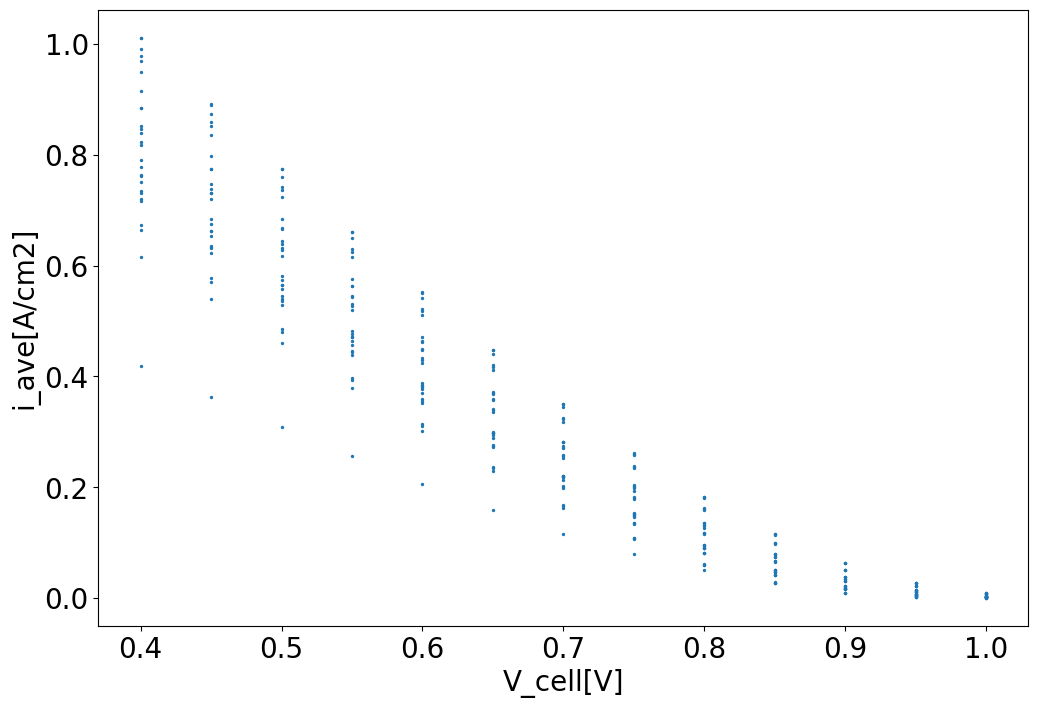

In [67]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sc = ax.scatter(df['V_cell'],df['i_ave']*0.0001,s=2,zorder=0)

# 目盛りのサイズを大きくする
ax.tick_params(axis='both', which='major', labelsize=20)

# x軸の値を指定
plt.xticks([0.4,0.5,0.6,0.7,0.8,0.9,1])

# 軸ラベルを追加
ax.set_xlabel('V_cell[V]', fontsize=20)
ax.set_ylabel('i_ave[A/cm2]', fontsize=20)

Text(0, 0.5, 'i_ave[A/cm2]')

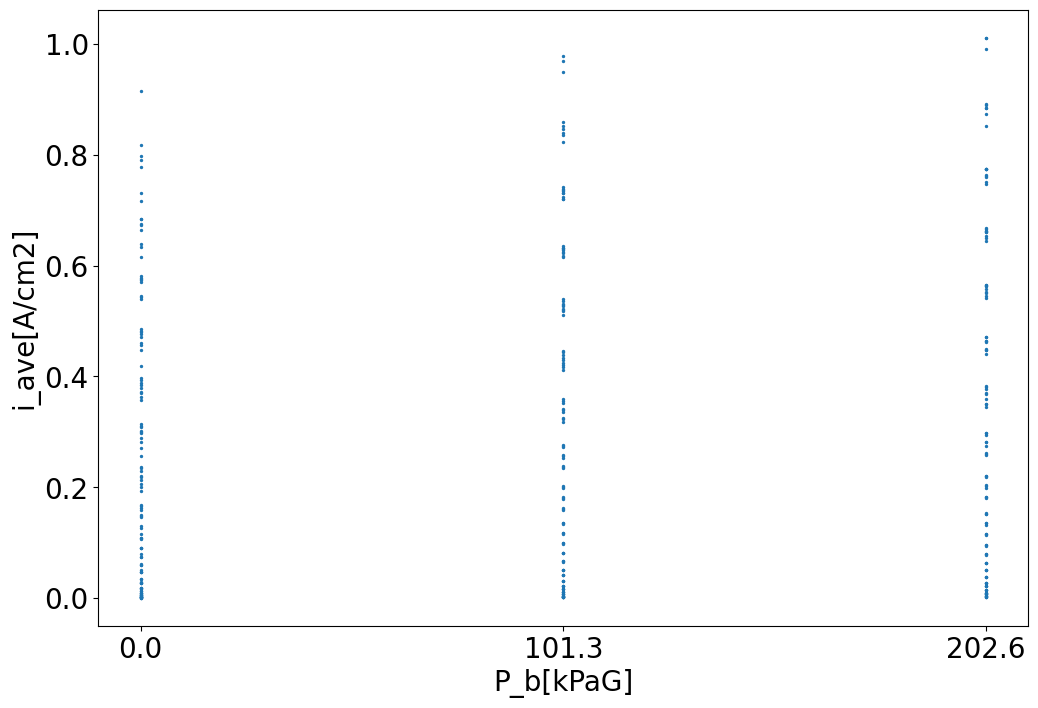

In [70]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sc = ax.scatter(df['P_b']*0.001,df['i_ave']*0.0001,s=2,zorder=0)

# 目盛りのサイズを大きくする
ax.tick_params(axis='both', which='major', labelsize=20)

# x軸の値を指定
plt.xticks([0,101.3,202.6])

# y軸ラベルを追加
ax.set_xlabel('P_b[kPaG]', fontsize=20)
ax.set_ylabel('i_ave[A/cm2]', fontsize=20)

Text(0, 0.5, 'i_ave[A/cm2]')

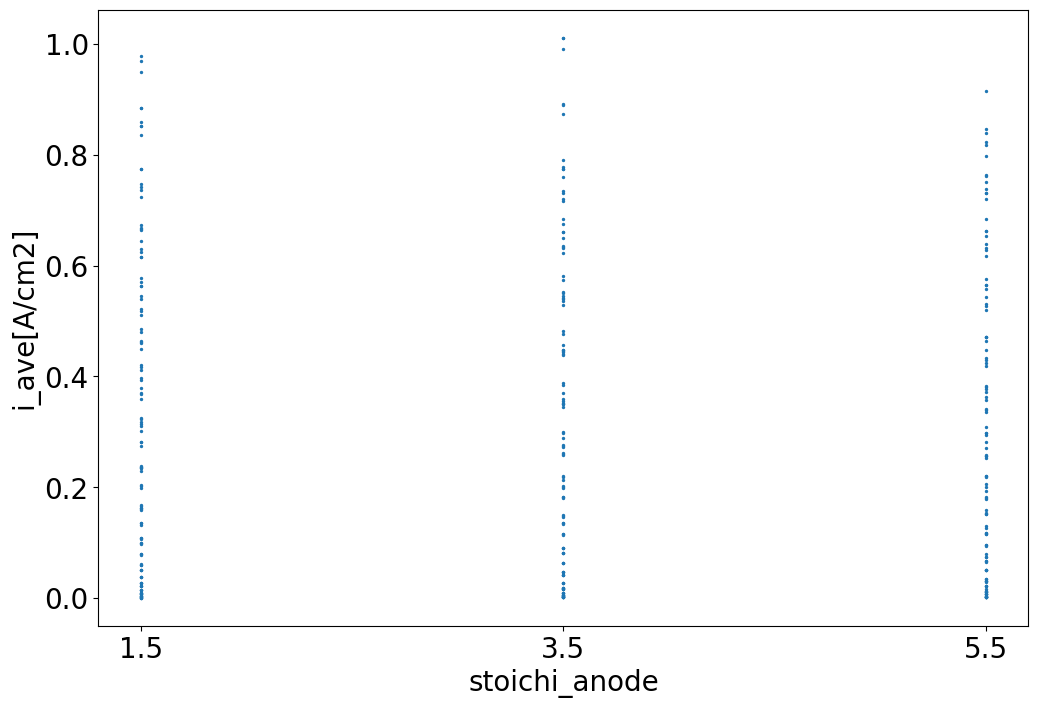

In [71]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

sc = ax.scatter(df['stoichi_anode'],df['i_ave']*0.0001,s=2,zorder=0)

# 目盛りのサイズを大きくする
ax.tick_params(axis='both', which='major', labelsize=20)

# x軸の値を指定
plt.xticks([1.5,3.5,5.5])

# y軸ラベルを追加
ax.set_xlabel('stoichi_anode', fontsize=20)
ax.set_ylabel('i_ave[A/cm2]', fontsize=20)